Завдання 1.


In [ ]:
import numpy as np
from numpy import linspace, array
from pylab import plot, xlabel, ylabel, legend, show
import scipy
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

import ipywidgets as widgets
from IPython.display import display

In [ ]:
a = 3.6
b = 1.8
c = 2.0
d = 1.0

alfa = 0.10
beta = 0.10

K1 = a/alfa
K2 = c/beta

In [ ]:
def system(t, N):
    x, y = N
    dxdt = a*x - b*x*y - alfa*x**2
    dydt = -c*y + d*x*y - beta*y**2
    return [dxdt, dydt]

In [ ]:
initial_conditions = [
    [10, 6],
    [0, 6],
    [10, 0]
]

t_span = (0, 20)
steps = [0.1, 0.01, 0.001]

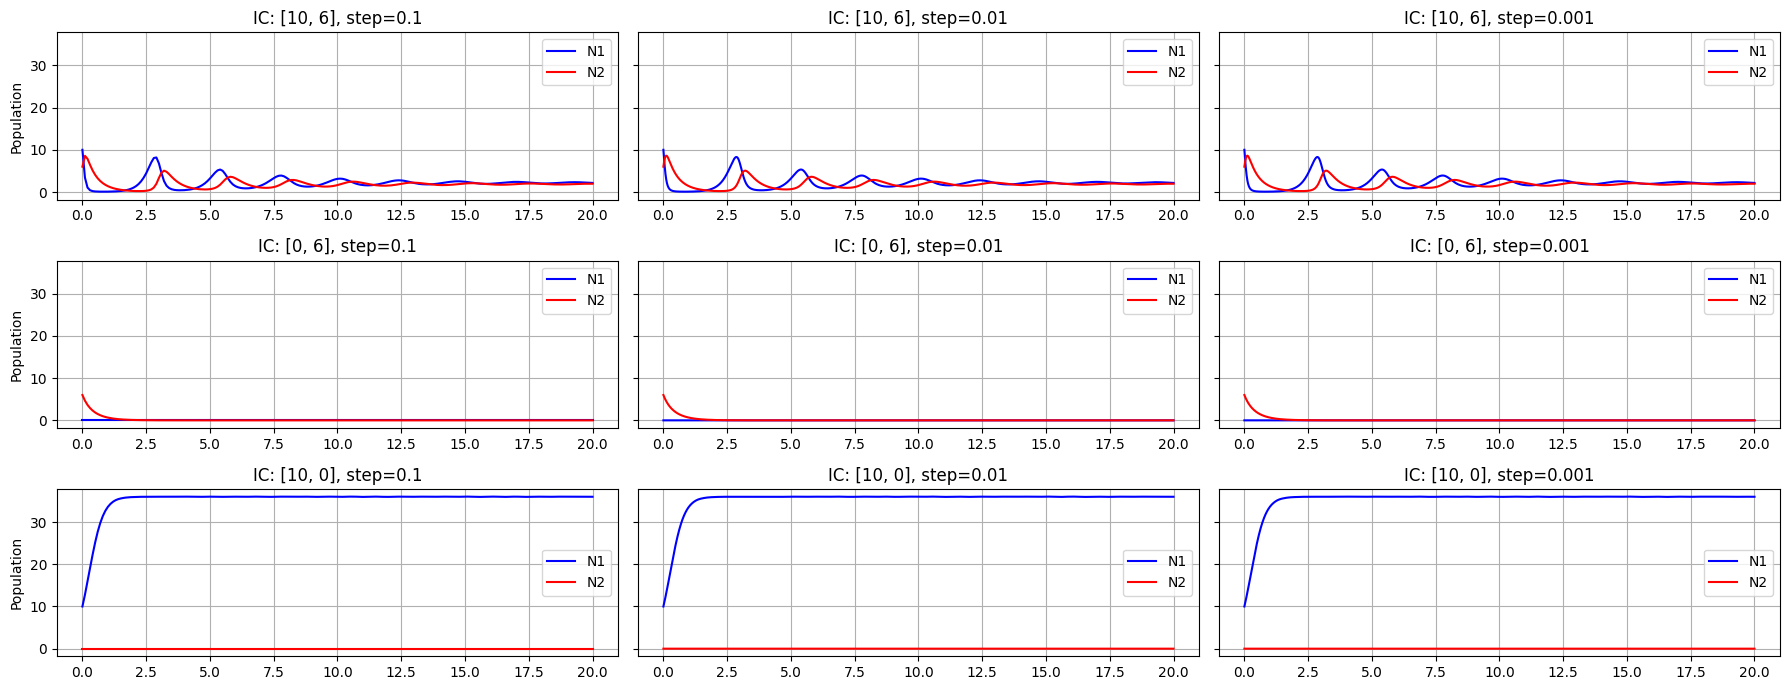

In [ ]:
fig, axes = plt.subplots(3, len(steps), figsize=(18,7), sharey=True)

for i, N0 in enumerate(initial_conditions):
    for j, h in enumerate(steps):
        t_eval = np.linspace(t_span[0], t_span[1], int((t_span[1] - t_span[0]) / h) + 1)
        sol = solve_ivp(system, t_span, N0, t_eval=t_eval, method='RK45')
        axes[i,j].plot(sol.t, sol.y[0], 'b', label='N1')
        axes[i,j].plot(sol.t, sol.y[1], 'r', label='N2')
        axes[i,j].set_title(f'IC: {N0}, step={h}')
        axes[i,j].legend()
        axes[i,j].grid(True)
        if j == 0:
            axes[i,j].set_ylabel('Population')

plt.tight_layout()
plt.show()

In [ ]:
def system_with_d(t, N, d):
    x, y = N
    dxdt = a*x - b*x*y - alfa*x**2
    dydt = -c*y + d*x*y - beta*y**2
    return [dxdt, dydt]

In [ ]:
def plot_with_slider(d=0.0):
    fig, axes = plt.subplots(3, len(steps), figsize=(18,7), sharey=True)
    for i, N0 in enumerate(initial_conditions):
        for j, h in enumerate(steps):
            t_eval = np.linspace(t_span[0], t_span[1], int((t_span[1] - t_span[0]) / h) + 1)
            sol = solve_ivp(lambda t, N: system_with_d(t, N, d), t_span, N0, t_eval=t_eval, method='RK45')
            axes[i,j].plot(sol.t, sol.y[0], 'b', label='N1')
            axes[i,j].plot(sol.t, sol.y[1], 'r', label='N2')
            axes[i,j].set_title(f'IC: {N0}, step={h}, d={d}')
            axes[i,j].legend()
            axes[i,j].grid(True)
            if j == 0:
                axes[i,j].set_ylabel('Population')
    plt.tight_layout()
    plt.show()

# Slider widget
slider = widgets.FloatSlider(value=0.0, min=0.5, max=1.5, step=0.1, description='d:')
widgets.interact(plot_with_slider, d=slider)

interactive(children=(FloatSlider(value=0.5, description='d:', max=1.5, min=0.5), Output()), _dom_classes=('wi…

<function __main__.plot_with_slider(d=0.0)>

d — це коефіцієнт ефективності хижака: скільки «їжі» (жертв) перетворюється на приріст популяції хижаків.

Чим більше d, тим швидше росте y при наявності жертв x.

Чим менше d, тим повільніше росте хижак, і при маленьких значеннях d хижаки можуть вимерти або коливання будуть слабшими.

d + 0.5 → хижаки ростуть швидше, коливання «x-y» будуть більшими, можливо виникнуть більші цикли.

d - 0.5 → хижаки ростуть повільніше, коливання менші, швидше стабілізується атрактор (стійка точка).

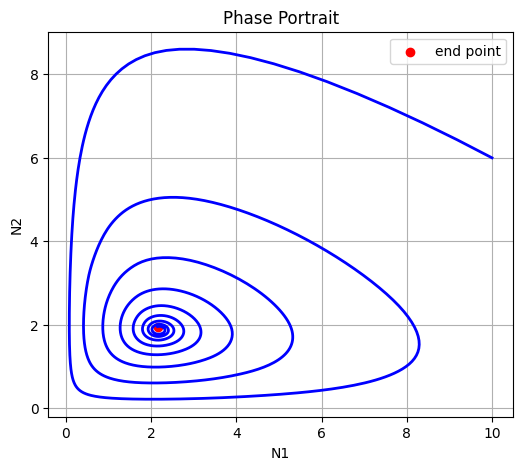

In [ ]:
N0 = [10, 6]
h = 0.01
t_eval = np.linspace(t_span[0], t_span[1], int((t_span[1]-t_span[0])/h)+1)
sol = solve_ivp(system, t_span, N0, t_eval=t_eval)


plt.figure(figsize=(6,5))
plt.plot(sol.y[0], sol.y[1], 'b', lw=2)
plt.scatter(sol.y[0][-1], sol.y[1][-1], color='red', label='end point')  # кінцева точка
plt.xlabel('N1')
plt.ylabel('N2')
plt.title('Phase Portrait')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
from scipy.optimize import fsolve
x, y = sp.symbols('x y', real=True)

eq1 = a*x - b*x*y - alfa*x**2
eq2 = -c*y + d*x*y - beta*y**2

solutions = sp.solve([eq1, eq2], (x, y))
print("Аналітичні особливі точки:")
for s in solutions:
    print(f"x* = {s[0]}, y* = {s[1]}")

def eqs(N):
    x, y = N
    dxdt = a*x - b*x*y - alfa*x**2
    dydt = -c*y + d*x*y - beta*y**2
    return [dxdt, dydt]

special_point = fsolve(eqs, N0)
print("\nЧисельно знайдена особлива точка (стійка):", special_point)

Аналітичні особливі точки:
x* = 0.0, y* = -20.0000000000000
x* = 0.0, y* = 0.0
x* = 2.18784530386740, y* = 1.87845303867403
x* = 36.0000000000000, y* = 0.0

Чисельно знайдена особлива точка (стійка): [2.1878453  1.87845304]


Аналітичні точки: SymPy видає всі можливі рішення системи (і фізично незначущі теж,  y* = -20 або x* = 36 залежно від параметрів).

Чисельна точка: fsolve знаходить ту, яка найближча до початкового наближення N0 = [10,16] — і це стійка, фізично реальна точка, яку можна використовувати для графіків і фазового аналізу.

In [ ]:
def jacobian(x, y):
    J = np.array([
        [a - b*y - 2*alfa*x, -b*x],
        [d*y, -c + d*x - 2*beta*y]
    ])
    return J

J = jacobian(*special_point)
eigenvalues, _ = np.linalg.eig(J)

print("Власні значення (λ):", eigenvalues)

Власні значення (λ): [-0.20331492+2.7198046j -0.20331492-2.7198046j]


Для знайденої особливої точки
(x∗,y∗) чисельний аналіз матриці Якобіана дав власні значення
𝜆1,2≈−0.2033±2.7198i. Оскільки власні значення утворюють комплексно-спряжену пару з від’ємною дійсною частиною, рівновага є стійким фокусом (спіраль-атрактором). Це узгоджується з фазовим портретом, де траєкторії обертаються навколо точки і поступово сходяться до неї (затухаючі коливання).

In [ ]:
def system_with_c(t, N, c):
    x, y = N
    dxdt = a*x - b*x*y - alfa*x**2
    dydt = -c*y + d*x*y - beta*y**2
    return [dxdt, dydt]

In [ ]:
def plot_with_slider(c=0.0):
    fig, axes = plt.subplots(3, len(steps), figsize=(18,7), sharey=True)
    for i, N0 in enumerate(initial_conditions):
        for j, h in enumerate(steps):
            t_eval = np.linspace(t_span[0], t_span[1], int((t_span[1] - t_span[0]) / h) + 1)
            sol = solve_ivp(lambda t, N: system_with_c(t, N, c), t_span, N0, t_eval=t_eval, method='RK45')
            axes[i,j].plot(sol.t, sol.y[0], 'b', label='N1')
            axes[i,j].plot(sol.t, sol.y[1], 'r', label='N2')
            axes[i,j].set_title(f'IC: {N0}, step={h}, c={c}')
            axes[i,j].legend()
            axes[i,j].grid(True)
            if j == 0:
                axes[i,j].set_ylabel('Population')
    plt.tight_layout()
    plt.show()

# Slider widget
slider = widgets.FloatSlider(value=0.0, min=0.5, max=3, step=0.1, description='c:')
widgets.interact(plot_with_slider, c=slider)

interactive(children=(FloatSlider(value=0.5, description='c:', max=3.0, min=0.5), Output()), _dom_classes=('wi…

<function __main__.plot_with_slider(c=0.0)>

c стоїть у члені -c * y, тобто він показує природну смертність або втрати популяції хижаків (навіть якщо їжі немає).

чим більше c, тим швидше зменшується кількість хижаків, якщо нема жертв;

чим менше c, тим довше хижаки виживають навіть без їжі.

In [ ]:
t_eval = np.linspace(*t_span, 1000)

def system_all(t, N, a, b, c, d, alfa, beta):
    x, y = N
    dxdt = a*x - b*x*y - alfa*x**2
    dydt = -c*y + d*x*y - beta*y**2
    return [dxdt, dydt]

In [ ]:
cases = [
    (0, 0.1, 'α=0'),
    (0.1, 0, 'β=0'),
    (0, 0, 'α=0, β=0')
]


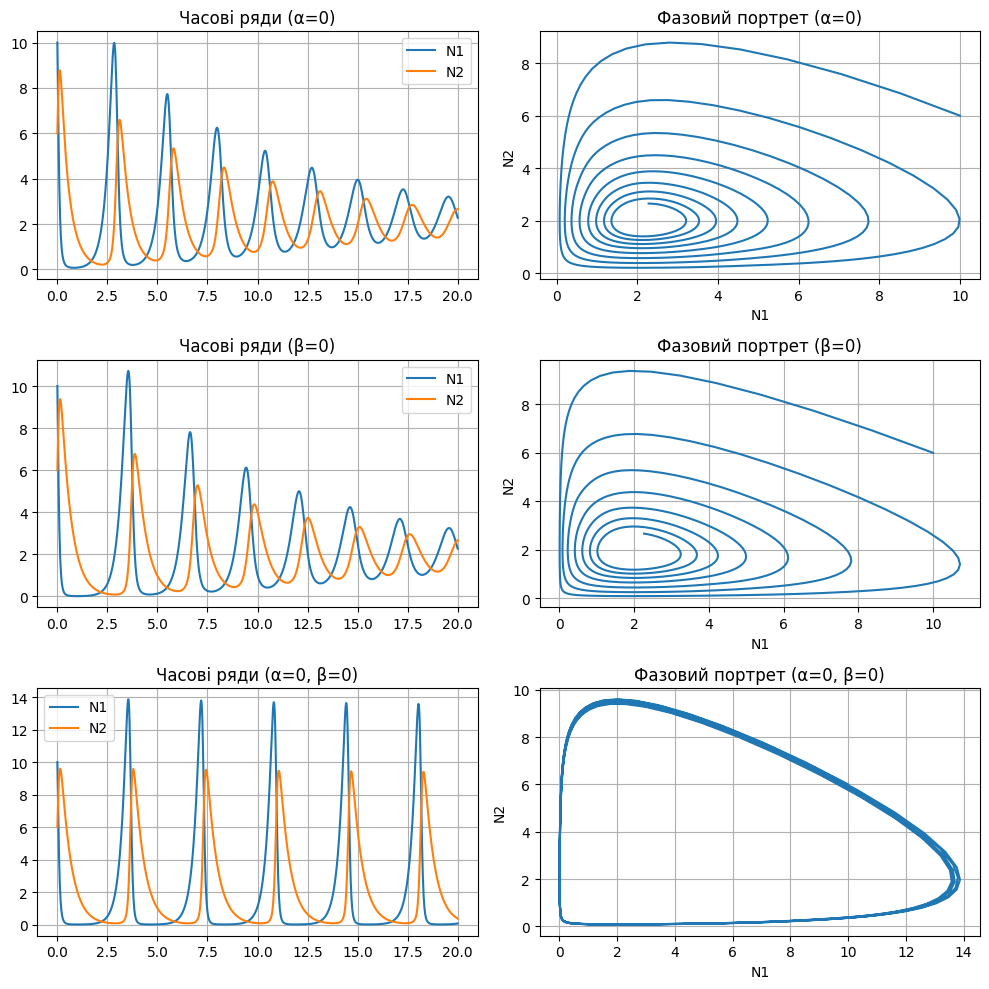

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(10, 10))
for i, (alfa, beta, label) in enumerate(cases):
    sol = solve_ivp(system_all, t_span, N0, args=(a,b,c,d,alfa,beta), t_eval=t_eval)
    x, y = sol.y

    # x(t), y(t)
    axes[i,0].plot(sol.t, x, label='N1')
    axes[i,0].plot(sol.t, y, label='N2')
    axes[i,0].set_title(f'Часові ряди ({label})')
    axes[i,0].legend(); axes[i,0].grid()

    # фазовий портрет
    axes[i,1].plot(x, y)
    axes[i,1].set_title(f'Фазовий портрет ({label})')
    axes[i,1].set_xlabel('N1'); axes[i,1].set_ylabel('N2')
    axes[i,1].grid()

plt.tight_layout()
plt.show()


In [ ]:
from scipy.optimize import fsolve
from numpy.linalg import eig

def equilibrium(alfa, beta):
    def eqs(N):
        x, y = N
        dxdt = a*x - b*x*y - alfa*x**2
        dydt = -c*y + d*x*y - beta*y**2
        return [dxdt, dydt]
    return fsolve(eqs, N0)

for alfa, beta, label in cases:
    eq = equilibrium(alfa, beta)
    x_eq, y_eq = eq

    # Якобіан
    J = np.array([
        [a - b*y_eq - 2*alfa*x_eq, -b*x_eq],
        [d*y_eq, -c + d*x_eq - 2*beta*y_eq]
    ])
    lambdas = np.linalg.eigvals(J)
    print(f"{label}: точка = {eq}, власні значення = {lambdas}")


α=0: точка = [2.2 2. ], власні значення = [-0.1+2.81247222j -0.1-2.81247222j]
β=0: точка = [2.         1.88888889], власні значення = [-0.1+2.60576284j -0.1-2.60576284j]
α=0, β=0: точка = [2. 2.], власні значення = [0.+2.68328157j 0.-2.68328157j]


Для трьох варіантів значень параметрів α і β побудовано часові графіки та фазові портрети системи.
У випадку (α=β=0) система демонструє замкнені цикли (нейтральний центр).
При α≠0 або β≠0 траєкторії спіралізуються до рівноважної точки — стійкий фокус (атрактор).